In [7]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import  NCDF, PRM19SBOPC
import matplotlib.pyplot as plt
import MDAnalysis.analysis.dihedrals
import numpy as np
%matplotlib inline

/Users/kieran/miniconda3/envs/mdanalysis/lib/python3.9/site-packages/MDAnalysis/analysis/dihedrals.py:528: DeprecationWarning: The `angle` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.angles` instead
  warnings.warn(wmsg, DeprecationWarning)


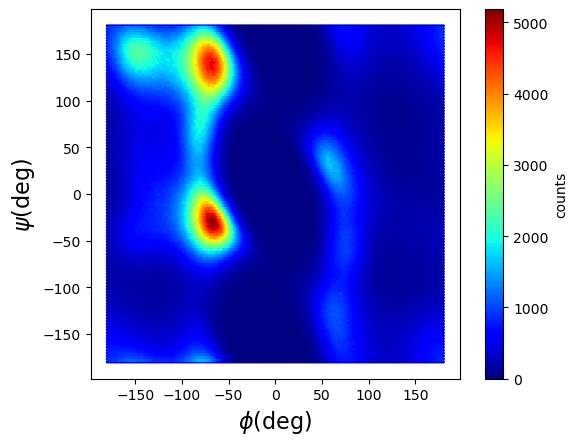

In [3]:
top = '/Users/kieran/foo/a_md/sa/sa_16.prmtop'
nc = '/Users/kieran/foo/a_md/sa/6_/mdcrd.nc'
u = mda.Universe(top, nc)
r = MDAnalysis.analysis.dihedrals.Ramachandran(u.select_atoms('protein')).run()

plt.hexbin(r.angles[:,:,0].ravel(), r.angles[:,:,1].ravel(), gridsize=200, cmap='jet')
plt.xlim(-181,181)
plt.ylim(-181,181)
plt.xlabel('$\phi$(deg)',fontsize=16)
plt.ylabel('$\psi$(deg)',fontsize=16)
plt.axis('square')
plt.colorbar(label='counts')

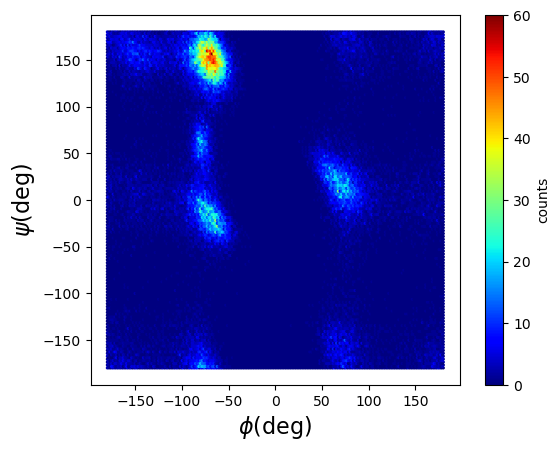

In [5]:
top = '/Users/kieran/foo/linker/club/club.prmtop'
nc = '/Users/kieran/foo/linker/club/5_conventional/mdcrd.nc'
u = mda.Universe(top, nc)
r = MDAnalysis.analysis.dihedrals.Ramachandran(u.select_atoms('protein')).run()

plt.hexbin(r.angles[:,5:,0].ravel(), r.angles[:,5:,1].ravel(), gridsize=200, cmap='jet')
plt.xlim(-181,181)
plt.ylim(-181,181)
plt.xlabel('$\phi$(deg)',fontsize=16)
plt.ylabel('$\psi$(deg)',fontsize=16)
plt.axis('square')
plt.colorbar(label='counts')

Text(0.5, 0, 'Frame')

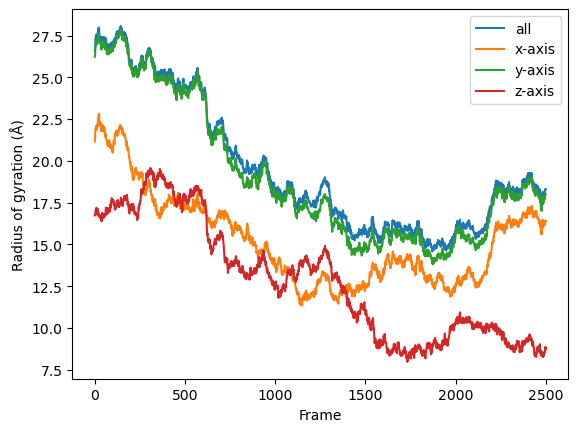

In [9]:
def radgyr(atomgroup, masses, total_mass=None):
    # coordinates change for each frame
    coordinates = atomgroup.positions
    center_of_mass = atomgroup.center_of_mass()

    # get squared distance from center
    ri_sq = (coordinates-center_of_mass)**2
    # sum the unweighted positions
    sq = np.sum(ri_sq, axis=1)
    sq_x = np.sum(ri_sq[:,[1,2]], axis=1) # sum over y and z
    sq_y = np.sum(ri_sq[:,[0,2]], axis=1) # sum over x and z
    sq_z = np.sum(ri_sq[:,[0,1]], axis=1) # sum over x and y

    # make into array
    sq_rs = np.array([sq, sq_x, sq_y, sq_z])

    # weight positions
    rog_sq = np.sum(masses*sq_rs, axis=1)/total_mass
    # square root and return
    return np.sqrt(rog_sq)

protein = u.select_atoms('protein')
rog = MDAnalysis.analysis.base.AnalysisFromFunction(radgyr, u.trajectory,
                           protein, protein.masses,
                           total_mass=np.sum(protein.masses))
rog.run()

labels = ['all', 'x-axis', 'y-axis', 'z-axis']
for col, label in zip(rog.results['timeseries'].T, labels):
    plt.plot(col, label=label)
plt.legend()
plt.ylabel('Radius of gyration (Å)')
plt.xlabel('Frame')

In [ ]:
from MDAnalysis.tests.datafiles import TRZ_psf, TRZ
import MDAnalysis as mda
from MDAnalysis.analysis import polymer
# u = mda.Universe(TRZ_psf, TRZ)
# this system is a pure polymer melt of polyamide,
# so we can select the chains by using the .fragments attribute
chains = u.atoms.fragments
# select only the backbone atoms for each chain
backbones = [chain.select_atoms('not name O* H*') for chain in chains]
# sort the chains, removing any non-backbone atoms
sorted_backbones = [polymer.sort_backbone(bb) for bb in backbones]
persistence_length = polymer.PersistenceLength(sorted_backbones)
# Run the analysis, this will average over all polymer chains
# and all timesteps in trajectory
persistence_length = persistence_length.run()
print('The persistence length is: {}'.format(persistence_length.lp))
# always check the visualisation of this:
persistence_length.plot()